# Question 2: If the frog can now jump to any lilypad, forwards or backwards, with equal probability, what is the average number of jumps it takes for any given amount of lilypads?

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [84]:
# maximum number of lily pads, plus one!!!!  In other words, n = 1 corresponds to zero lily
# pads.  The point here is that all of the sums/formulas/etc. always go up to n+1, so let's
# just rescale the problem 

nmax = 100

In [85]:
random.seed(1)

In [86]:
# some variables to keep track of where the frog is, how many jumps he has taken for
# this iteration of the simulation, and how many total jumps he has taken across all
# iterations.
pos = 0
jumpsum = 0
total_jumps = 0

# how many times we will run the simulation
n_trys = 1000

# create some arrays to hold various quantities, as a function of n.  We want to
# run the simulation for n = 1 ... nmax
x = []
y = []
eval = [] # this will be used for intermediate steps in the recursion method
evalr = [] # this will be for the recursion method - it is just eval[] shifted by one, 
sigma = []

In [87]:
for npad in range(1,nmax+1): 

    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        evalr.append(eval[npad-1])
    print("Theory: ",npad,eval[npad-1],evalr[npad-1])
    
    x.append(npad)
    
    end = npad
    
    # simulate the process of getting across the stream n_trys times
    for j in range(n_trys):
        
        # main simulation loop
        while pos < npad:
            jump = int(random.uniform(1,end))
            pos = pos + jump
            jumpsum = jumpsum + 1
        
        # reset pos to zero, add to total jumps, reset jumpsum
        pos = 0
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f +/- %f" % (npad,expectation_value,expectation_value*1/np.sqrt(n_trys)))
    

Theory:  1 1 1
Expectation value for n = 1 is 1.000000 +/- 0.031623
Theory:  2 1.5 1.5
Expectation value for n = 2 is 2.000000 +/- 0.063246
Theory:  3 1.8333333333333333 1.8333333333333333
Expectation value for n = 3 is 2.245000 +/- 0.070993
Theory:  4 2.083333333333333 2.083333333333333
Expectation value for n = 4 is 2.366000 +/- 0.074819
Theory:  5 2.2833333333333337 2.2833333333333337
Expectation value for n = 5 is 2.474000 +/- 0.078235
Theory:  6 2.4499999999999997 2.4499999999999997
Expectation value for n = 6 is 2.471000 +/- 0.078140
Theory:  7 2.5928571428571425 2.5928571428571425
Expectation value for n = 7 is 2.515000 +/- 0.079531
Theory:  8 2.7178571428571425 2.7178571428571425
Expectation value for n = 8 is 2.533000 +/- 0.080100
Theory:  9 2.8289682539682537 2.8289682539682537
Expectation value for n = 9 is 2.540000 +/- 0.080322
Theory:  10 2.928968253968254 2.928968253968254
Expectation value for n = 10 is 2.589000 +/- 0.081871
Theory:  11 3.0198773448773446 3.0198773448773

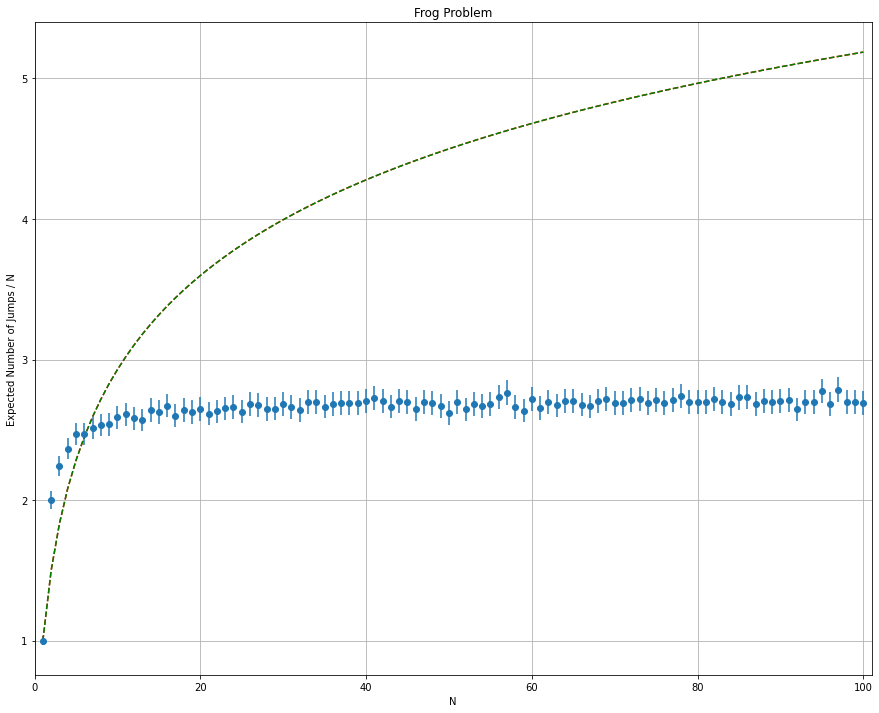

In [88]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,evalr,'r--')
ax1.plot(x,eval,'g--')

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,nmax+1)
ax1.grid(True)


# This is very surprising! It seems the average number of jumps levels off very quickly to around 2.7. This is much less than the previous case where the forg is limited to only jumping in the forward direction. 

In [89]:
jumps = []

for j in range(n_trys):
        
        # main simulation loop
        while pos < nmax+1:
            jump = int(random.uniform(1,nmax+1))
            pos = pos + jump
            jumpsum = jumpsum + 1
        
        jumps.append(jumpsum)
        # reset pos to zero, add to total jumps, reset jumpsum
        pos = 0
        total_jumps = total_jumps + jumpsum
        jumpsum = 0

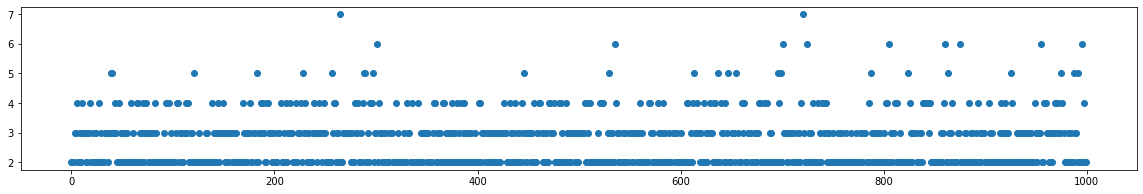

In [90]:
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(range(n_trys), jumps)

# Here we can see that for 30 lilypads, the vast majority of trials took 2 or 3 jumps to reach the end. There are some rare cases of 5,6, and even 7 jumps, but they are so few and fare between that they statistically do not contribute much. This plot supports the previous results of around 2.7 average jumps. 